<a href="https://colab.research.google.com/github/eccardoso/mvp-analise-de-dados-e-boas-praticas/blob/main/MVP_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas
**Edson da Costa Cardoso**

### **MVP - Panorama da criminalidade no Estado do Rio de Janeiro**

### **1. Definição do Problema**

O dataset usado neste projeto será a base de Dados de Violência no Estado do Rio de Janeiro no período de 2014 a 2021 por município e um subconjunto dos tipos de crimes praticados. O objetivo é compreender a criminalidade no estado do Rio de Janeiro mostrando as regiões consideradas mais violentas e as menos violentas e quais os tipos de crimes mais presentes neste período.

**O dataset contém as seguintes variáveis categóricas:**

•	fmun_cod – código dos municípios do estado do Rio de Janeiro

•	fmun - nome dos 91 municípios do estado do Rio de Janeiro

•	ano – 2014 a 2021

•	mês - 1 a 12

•	região – Baixada Fluminense, Capital, Grande Niterói e Interior   

**O dataset contém as seguintes variáveis numéricas que representam o número dos seguintes crimes:**
             
•	hom_doloso

•	lesao_corp_morte    

•	latrocinio     

•	hom_por_interv_policial

•	estupro

•	roubos

•	furtos  

•	sequestro_relampago     

•	estelionato

•	trafico_drogas        

São 7.912 observações e 15 variáveis

Para mais detalhes sobre este dataset, consulte: https://www.ispdados.rj.gov.br/

In [182]:
# Importar bibliotecas para a programação
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#**2. Carga e Preparação do Dataset**

Para carregar o arquivo .csv, foi utilizado o pacote Pandas (Python Data Analysis Library).

In [183]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/eccardoso/mvp-analise-de-dados-e-boas-praticas/main/BaseMunicipioMensalv3.csv"

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url,  delimiter=';')

Com a função dataset.head(10) é posssível mostrar na tela as 10 primeiras linhas do dataset o que permite fazer a verificação se os dados foram carregados corretamente.

In [184]:
dataset.head(10)

,fmun_cod,fmun,ano,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
0,3300100,Angra dos Reis,2014,1,Interior,11,0,0,1,7,23,134,0,21,12
1,3300159,Aperibé,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
2,3300209,Araruama,2014,1,Interior,2,0,0,0,7,23,105,0,18,4
3,3300225,Areal,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
4,3300233,Armação dos Búzios,2014,1,Interior,2,0,0,0,6,12,117,0,4,10
5,3300258,Arraial do Cabo,2014,1,Interior,0,0,0,0,2,6,49,0,8,10
6,3300308,Barra do Piraí,2014,1,Interior,1,0,0,0,5,7,38,0,4,5
7,3300407,Barra Mansa,2014,1,Interior,5,0,0,0,4,18,122,0,5,10
8,3300456,Belford Roxo,2014,1,Baixada Fluminense,29,0,0,0,11,307,170,0,29,29
9,3300506,Bom Jardim,2014,1,Interior,0,0,0,0,1,2,9,0,3,2


Como a quantidade de incidente por mês apresenta muitos zeros em alguns tipos de crime e devido a complexidade do contexto problemático decidiu-se fazer uma análise por ano.

In [185]:
# Eliminando colunas não relevantes para análise
datasetdrop=dataset.drop(['fmun_cod','mes'],axis='columns')

# Agrupando os incidentes por municipio, ano e região
agrupamento = datasetdrop.groupby(['fmun','ano','regiao'], as_index=False)

# Totalizando os incidentes por municipio, ano e região
soma_incidente=agrupamento.sum()

Foi gerado um novo dataset, soma_incidente, onde teremos a quantidade de incidentes por ano em cada município que foi obtido pela soma dos incidentes mensais. Por simplicidade no novo dataset foram excluidas as colunas fmun_cod e mês.

In [186]:
# Validar os dados gerados

soma_incidente.head(10)

,fmun,ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
0,Angra dos Reis,2014,Interior,75,0,1,2,92,373,1277,0,196,202
1,Angra dos Reis,2015,Interior,92,0,0,13,83,363,1128,0,201,248
2,Angra dos Reis,2016,Interior,85,1,1,7,56,651,989,0,181,229
3,Angra dos Reis,2017,Interior,87,0,0,26,60,670,691,2,160,260
4,Angra dos Reis,2018,Interior,132,0,1,51,73,728,715,0,133,280
5,Angra dos Reis,2019,Interior,89,0,2,50,58,596,597,1,162,206
6,Angra dos Reis,2020,Interior,67,0,1,40,64,243,458,0,280,275
7,Angra dos Reis,2021,Interior,7,0,0,7,6,51,91,0,71,36
8,Aperibé,2014,Interior,0,0,0,0,0,0,0,0,0,0
9,Aperibé,2015,Interior,0,0,0,0,0,0,0,0,0,0


# **3. Análise de Dados**

**3.1. Estatísticas Descritivas**


Vamos iniciar examinando as dimensões do dataset e suas informações

In [187]:
# Atribui o Soma_incidente ao dataset original
dataset=soma_incidente

# Mostra as dimensões do dataset
print(dataset.shape)

(736, 13)


O comando print mostra que o dataset tem 736 linhas e 13 colunas.

No comando print(dataset.info()) mostra os tipos de variáveis.



In [188]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   fmun                     736 non-null    object
 1   ano                      736 non-null    int64 
 2   regiao                   736 non-null    object
 3   hom_doloso               736 non-null    int64 
 4   lesao_corp_morte         736 non-null    int64 
 5   latrocinio               736 non-null    int64 
 6   hom_por_interv_policial  736 non-null    int64 
 7   estupro                  736 non-null    int64 
 8   roubos                   736 non-null    int64 
 9   furtos                   736 non-null    int64 
 10  sequestro_relampago      736 non-null    int64 
 11  estelionato              736 non-null    int64 
 12  trafico_drogas           736 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 74.9+ KB
None


Observa-se que a variável ano apesar de ser uma variável qualitativa esta definida como quantitativa pois é representada por números como por exemplo ano de 2014. Isto requer uma ação de transformação desta varíavel para análise adequada com o tipo de variável.

In [189]:
# Convertendo variaveis para o resumo estatítico
dataset["ano"] = dataset["ano"].astype(str)

# Verifica o tipo de dataset de cada atributo
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   fmun                     736 non-null    object
 1   ano                      736 non-null    object
 2   regiao                   736 non-null    object
 3   hom_doloso               736 non-null    int64 
 4   lesao_corp_morte         736 non-null    int64 
 5   latrocinio               736 non-null    int64 
 6   hom_por_interv_policial  736 non-null    int64 
 7   estupro                  736 non-null    int64 
 8   roubos                   736 non-null    int64 
 9   furtos                   736 non-null    int64 
 10  sequestro_relampago      736 non-null    int64 
 11  estelionato              736 non-null    int64 
 12  trafico_drogas           736 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 74.9+ KB
None


O comando dataset.dtypes foi utilizado para confirmar a natureza das variáveis para prosseguimento da análise. Nota-se que a variável ano agora está codificada corretamente. Esta transformação era importante pois no resumo estatístico teriamos calculo de medidas descritivas, como por exemplo média e desvio padrão para esta variável o que não teria o menor sentido.

O comando dataset.tail(10) mostra a visualização das 10 ultimas linhas.

In [190]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,fmun,ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
726,Vassouras,2020,Interior,6,0,0,0,15,10,76,0,41,41
727,Vassouras,2021,Interior,1,0,0,1,1,3,12,0,16,6
728,Volta Redonda,2014,Interior,56,0,2,1,74,440,2110,1,480,326
729,Volta Redonda,2015,Interior,36,0,0,0,65,242,2306,0,463,398
730,Volta Redonda,2016,Interior,65,0,0,4,40,572,1990,0,458,385
731,Volta Redonda,2017,Interior,63,0,1,2,66,596,1424,1,412,430
732,Volta Redonda,2018,Interior,72,1,2,8,59,574,1484,0,464,359
733,Volta Redonda,2019,Interior,89,1,0,9,49,621,1696,0,612,384
734,Volta Redonda,2020,Interior,70,0,1,14,52,399,1288,0,896,336
735,Volta Redonda,2021,Interior,9,0,0,1,12,90,222,0,191,59


**Tratamento de Missing**

In [191]:
# verificando nulls no dataset
dataset.isnull().sum()

fmun                       0
ano                        0
regiao                     0
hom_doloso                 0
lesao_corp_morte           0
latrocinio                 0
hom_por_interv_policial    0
estupro                    0
roubos                     0
furtos                     0
sequestro_relampago        0
estelionato                0
trafico_drogas             0
dtype: int64

- Acima verificamos não existir nenhum valor faltante no dataset utilizado não requerendo nenhum tratamento

- Com o comando dataset.describe() abaixo temos uma tabela com as medidas descritivas das variáveis numéricas do dataset.



In [192]:
# Arredondamento com 2 casas decimais dos valores calculados

round(dataset.describe(percentiles=[.05,.25,.50,.75,.95,.99]),2)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00
mean,44.34,0.42,1.58,11.10,49.74,1795.77,1500.56,1.10,365.68,119.87
std,136.55,2.01,6.60,51.29,164.22,9928.47,8806.68,7.40,2141.73,294.56
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,5.00,6.00,52.00,0.00,11.00,11.00
50%,7.00,0.00,0.00,0.00,13.00,39.00,189.50,0.00,35.50,40.00
75%,31.00,0.00,1.00,2.00,42.00,278.00,691.50,0.00,162.75,108.25
95%,187.75,2.00,6.00,51.25,155.00,7209.75,3320.50,3.00,994.75,429.25
99%,495.30,5.30,23.95,212.65,355.65,22733.50,10093.50,12.95,3768.80,1056.20


Verificamos que os crimes com baixa incidência no periodo analisado no estado do Rio de Janeiro são: lesão corporal por morte, latrocínio e sequestro_relâmpago. Os mesmos possuem em média menos de dois incidentes por ano. Roubos e furtos são os dois crimes com maior número de incidentes com médias de 1.795,77 e 1.500,56 incidentes, respectivamente. Isto é percebido também quando analisamos o máximo e o terceiro quartil dos tipos de crimes. Ambos os crimes possuem uma dispersão grande com desvio padrão em torno de 9.000 incidentes necessitando uma análise mais detalhada da distribuição dos dados. Pelo percentil 0,99 verificamos que 1% dos dados apresenta valor acima de 22.000 incidentes para roubos e 10.000 para furtos. Estelionato tem uma quantidade de incidentes intermediária considerando os demais crimes com uma média de 365,68 incidentes. Há indicios de assimetria e presença de valores extremos quando analisamos os percentis das distribuições, pois a diferença do percentil 0,99 para o máximo é grande em todos os casos. De um modo geral é preciso analisar a partir de gráficos as distribuições de cada variável para melhor análise destes dados.

**3.2. Visualizações unimodais**

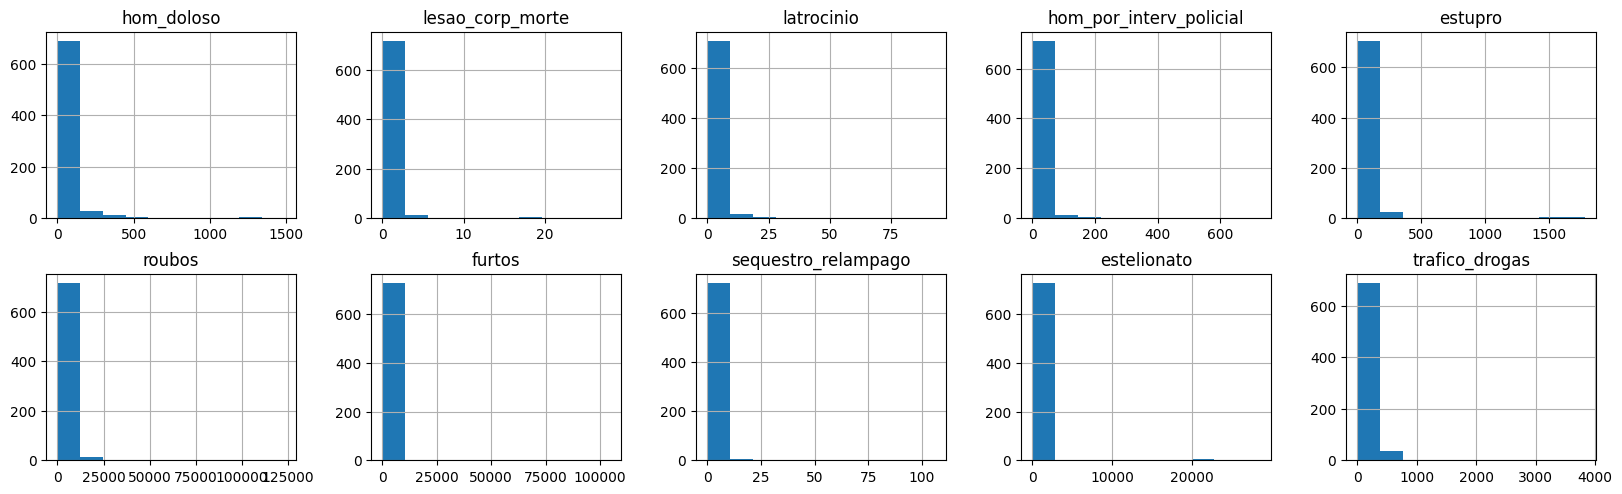

In [193]:
# Descartando colunas não numericas
datasetclone=dataset.iloc[:,3:]

# Plotando os hstogramas
datasetclone.hist(layout = (5,5),figsize = (20,15))
plt.show()



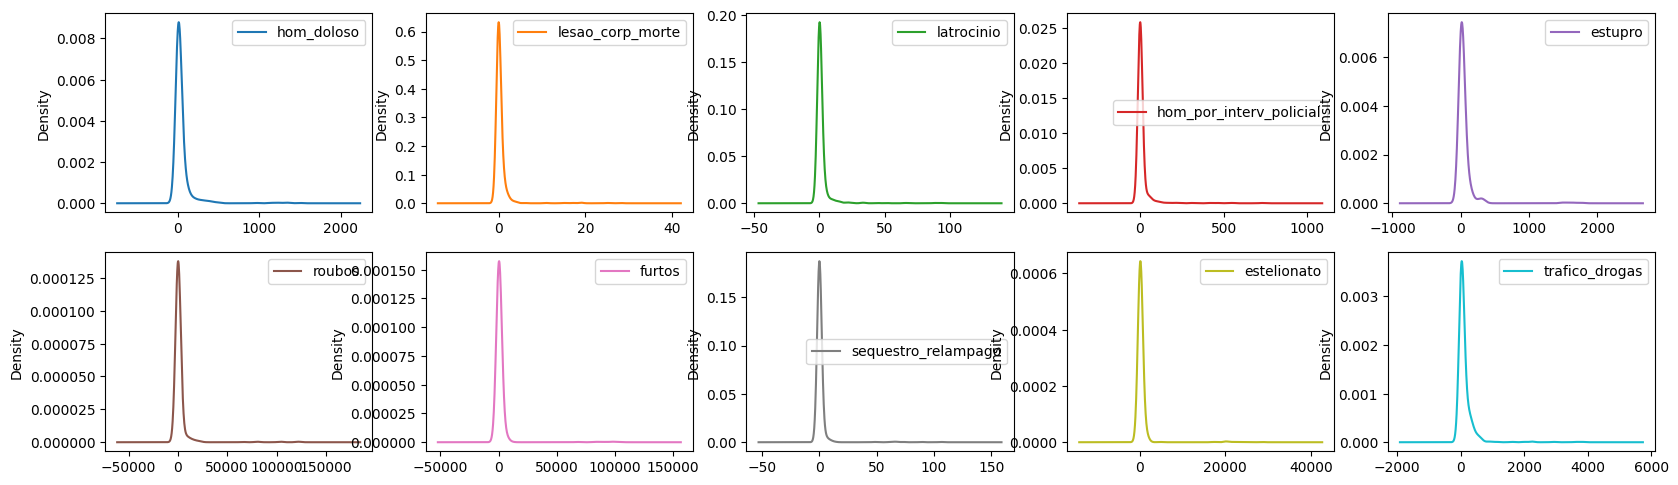

In [194]:
# Density Plot
datasetclone.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize = (20,15))
plt.show()

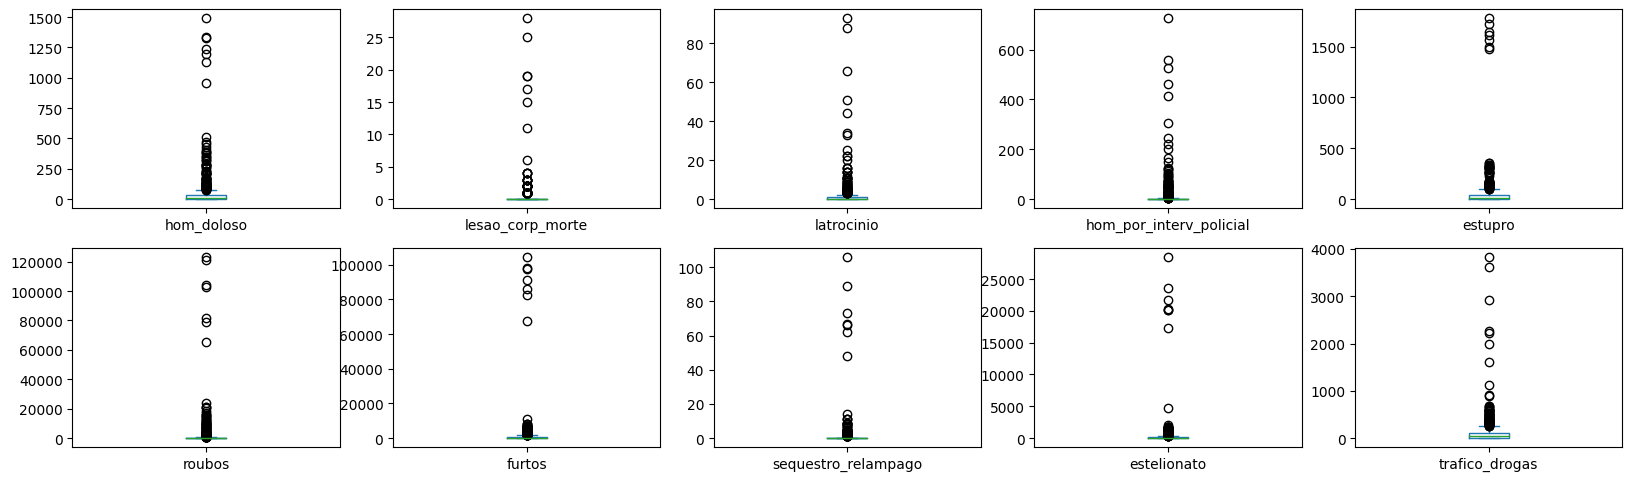

In [195]:
# Boxplot
datasetclone.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))
plt.show()

Nos gráficos acima, histograma, densidade e boxplot, fica evidente o comportamento assimétrico das distribuições que apresentam alta concentração em valores baixos e poucos valores altos de incidentes indicando que nenhuma das distribuições são aproximadamente normais. Em alguns casos pode-se pensar numa normalização dos dados porém neste caso em específico está sendo analisado conjuntamente municípios menores e talvez menos violentos com municípios maiores e talvez mais violentos, além de analisar em alguns anos incluindo período de pandemia.  Pouca conclusão temos com o dado agregado até aqui.
A normalização neste caso também não seria adequada e sim uma análise mais desagregada por região ou por ano pra tentar compreender melhor a criminalidade no estado do Rio de Janeiro. A hipótese é que a Capital tenha maior número de incidentes nos diversos tipos de crimes enquanto no interior seja menor.  Ressalta-se que neste dataset temos o número de incidentes por ano nos municipios e não as taxas que levaria em conta o tamanho da população. A seguir faremos uma análise por região e por ano para melhorar nossa compreensão sobre os dados.

**3.3. Análise por Região**

In [196]:
# Agrupando por regiao
agrupamento_regiao = dataset.groupby('regiao')

**Análise por Capital**

In [197]:
# Selecionando somente a Capital
selecao_capital=agrupamento_regiao.get_group('Capital')

# Tabela com as medidas descritivas da Capital arredondadas para duas casas decimais
round (selecao_capital.describe(percentiles=[.05,.25,.75,.95,.99]),2)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00
mean,1106.88,16.88,51.75,417.25,1448.38,86227.25,79820.12,64.75,19538.75,2344.88
std,411.22,8.36,29.60,197.94,482.06,36199.00,30010.87,29.25,6848.78,1135.90
min,167.00,1.00,5.00,95.00,283.00,12130.00,11098.00,7.00,4676.00,297.00
5%,443.50,4.50,14.80,148.20,702.30,30801.45,30842.55,21.35,9096.15,755.50
25%,1089.75,14.00,33.75,292.00,1494.50,75772.25,78745.25,58.50,19381.00,1900.25
50%,1218.50,18.00,47.50,439.00,1587.50,92315.50,88701.00,66.50,20219.00,2247.00
75%,1332.00,20.50,71.50,534.75,1663.00,108382.00,97650.00,77.00,22192.25,3090.25
95%,1438.10,26.95,91.25,667.20,1761.75,122420.75,102238.00,100.05,26777.75,3755.90
99%,1481.22,27.79,92.65,714.24,1777.15,122984.95,104041.20,104.81,28125.95,3813.58


A capital é composta apenas pelo municipio do Rio de Janeiro e pelas estatísticas calculadas. É possível perceber que o número de incidentes para todos os tipos de crimes analisados é maior do que em outras regiões. Como exempo o número mínimo de incidentes do crime roubos é de 12.130, um valor maior que a média encontrada na análise conjunta que foi de 1.795,77 incidentes. Isto acontece em todas as variáveis pois o municipio do Rio de Janeiro é um outlier na base de dados. Como já foi informado, não esta sendo considerado o número de habitantes e somente o número de incidentes por ano.

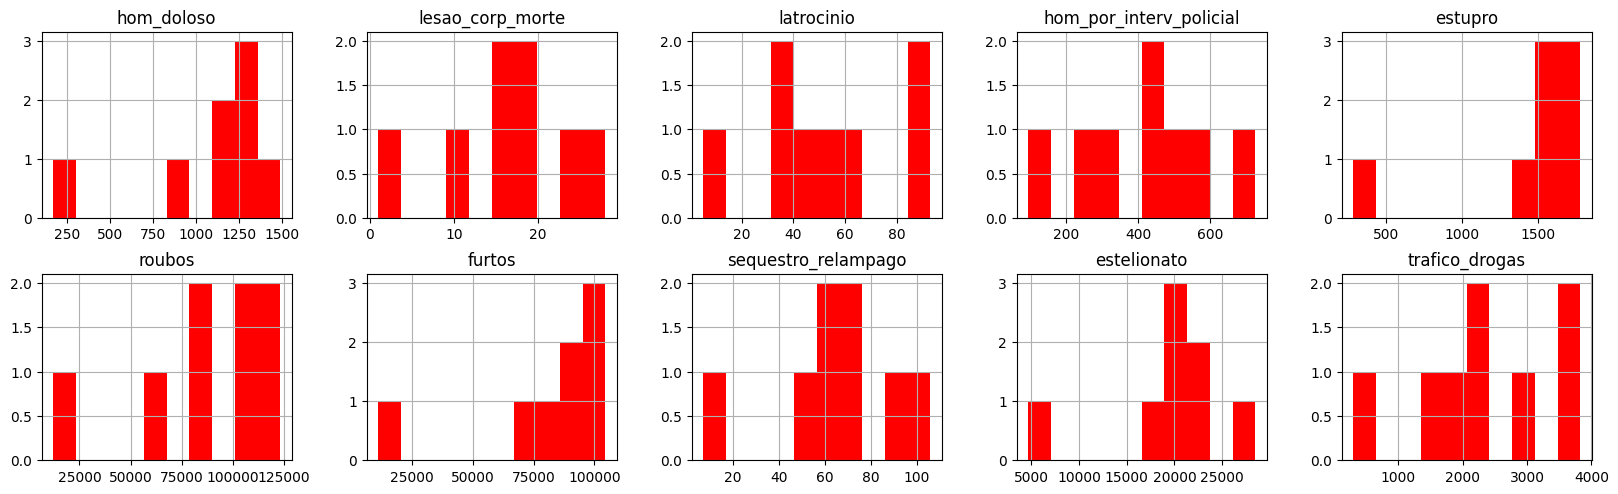

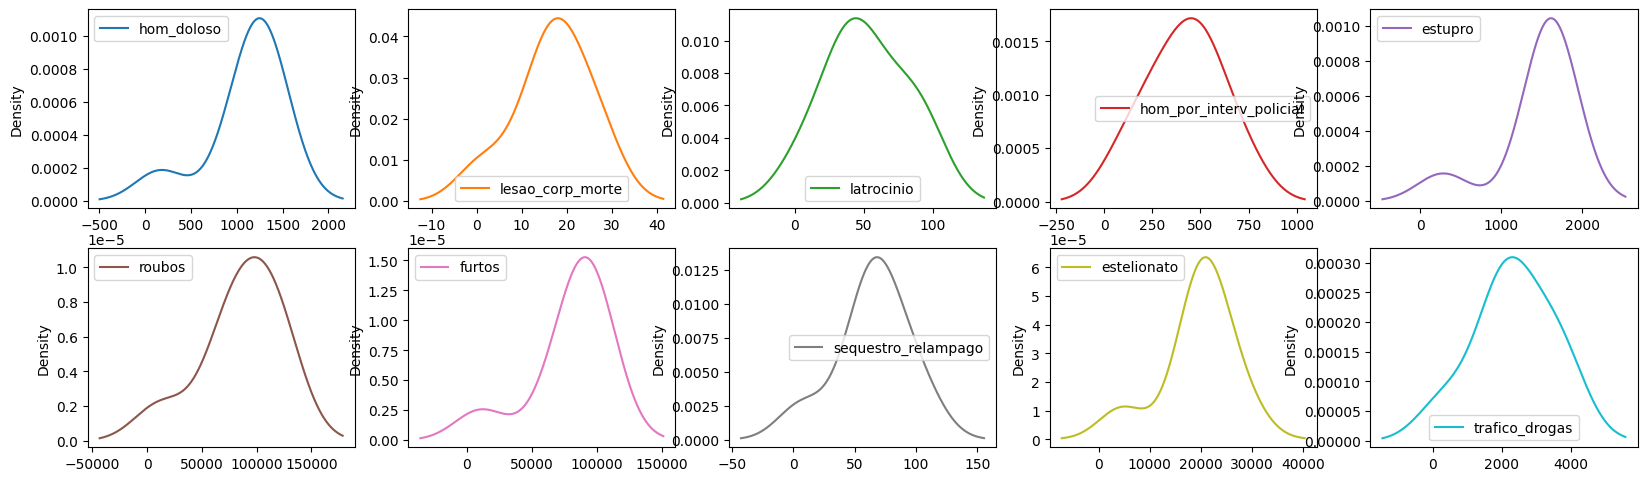

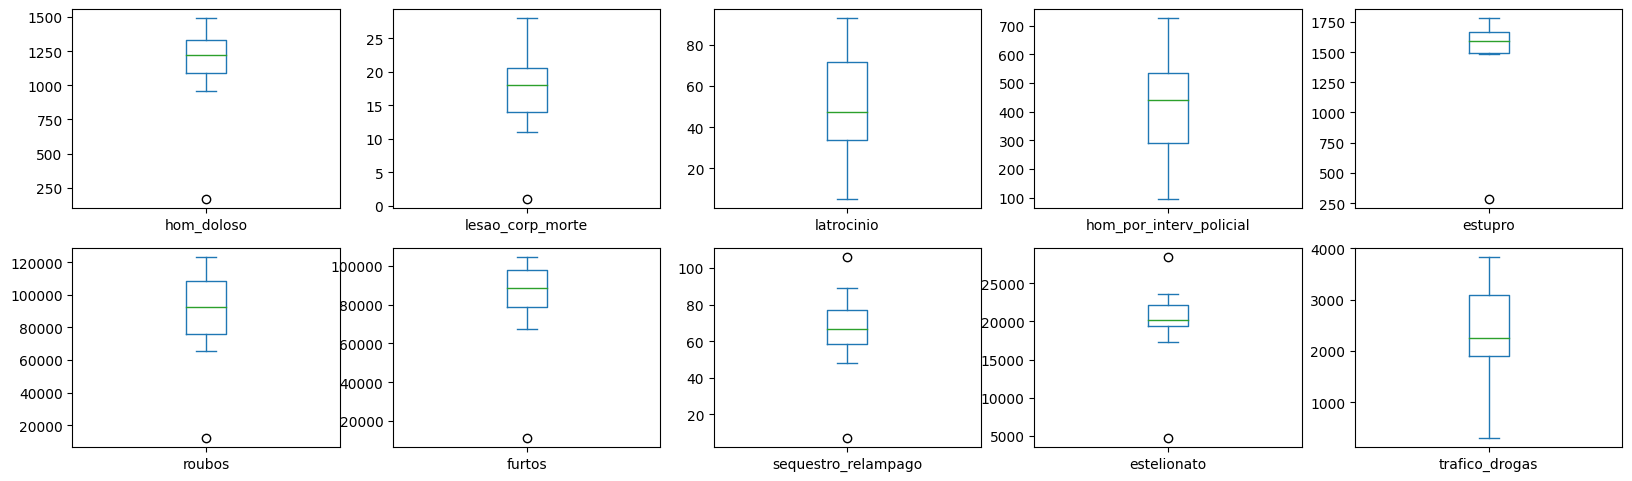

In [198]:
# Histograma
selecao_capital.hist(layout = (5,5),figsize = (20,15),color="red")

# Density Plot
selecao_capital.plot(kind = 'density',subplots = True, layout = (5,5),  sharex = False, figsize = (20,15))

# Boxplot
selecao_capital.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

plt.show()

A interpretação dos graficos histograma e densidade é dificultada pelo número de observações pois temos apenas um municipio e 8 anos, no que diz respeito as caracteristicas da distribuição como normalidade dos dados. O boxplot realça algum ano que foi destoante dos demais no número de incidentes em alguns crimes. O valor inferior que se destoa dos demais em alguns crimes provavelmente foi o ano de 2021 devido a pandemia, mas uma análise temporal poderá confirmar isto.  

**Analise por Interior**

In [199]:
# Selecionando somente o Interior
selecao_interior=agrupamento_regiao.get_group('Interior')

# Tabela com as medidas descritivas do interior arredondadas para duas casas decimais
round(selecao_interior.describe(percentiles=[.05,.25,.75,.95,.99]),2)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00
mean,15.77,0.13,0.36,1.47,20.02,149.76,361.39,0.12,81.38,77.24
std,30.97,0.45,0.88,4.97,28.37,396.28,569.91,0.61,143.18,117.53
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,4.00,4.00,42.00,0.00,9.00,9.00
50%,4.00,0.00,0.00,0.00,10.00,20.00,133.50,0.00,25.00,29.00
75%,15.00,0.00,0.00,1.00,21.00,99.00,368.50,0.00,70.25,80.25
95%,81.00,1.00,2.00,7.00,78.15,745.30,1631.85,1.00,412.00,329.20
99%,146.07,2.00,4.00,26.00,141.00,2070.95,2676.84,3.00,710.04,590.05


O cenário no interior é diferente da capital no que concerne ao número de incidentes pois apresentam em média valores bem menores. Porém não esta sendo considerado nesta análise o tamanho da população dos municípios. Roubos e furtos prevalecem como sendo os crimes com maiores número de incidentes no interior do estado nos anos avaliados.

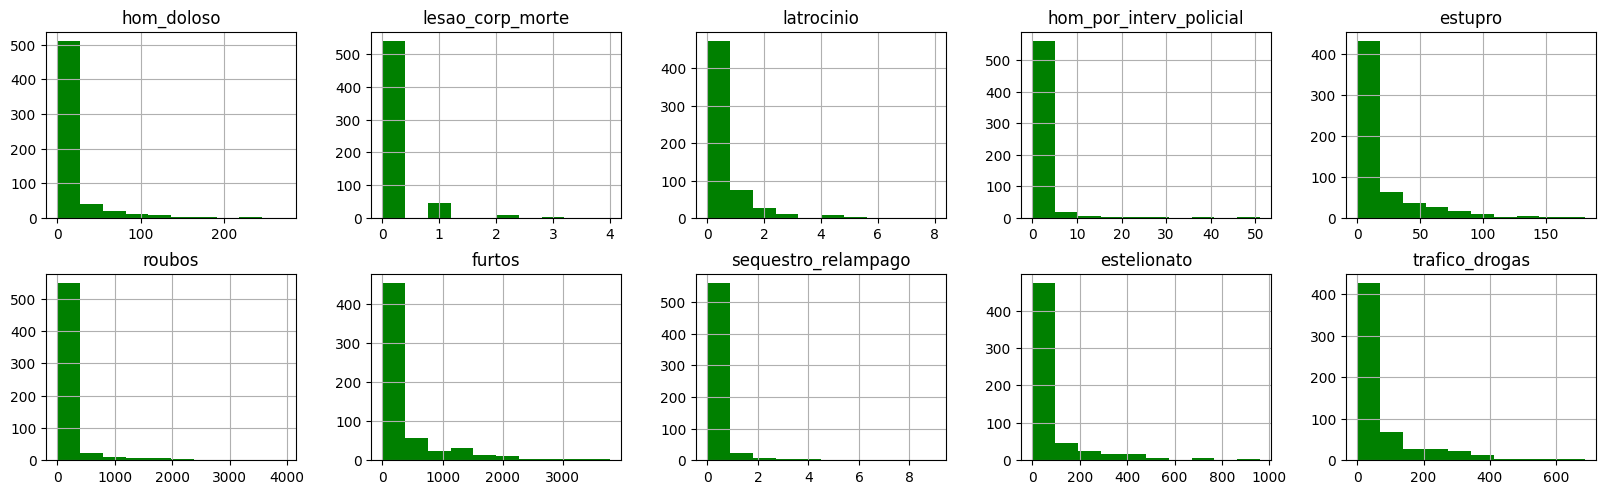

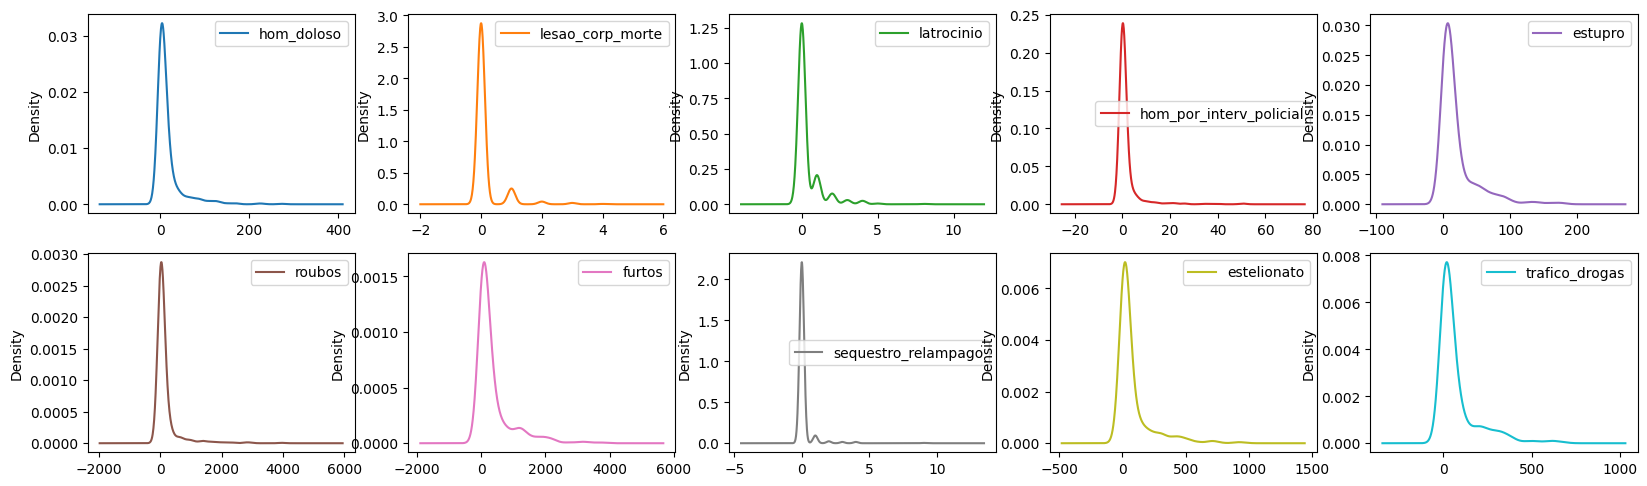

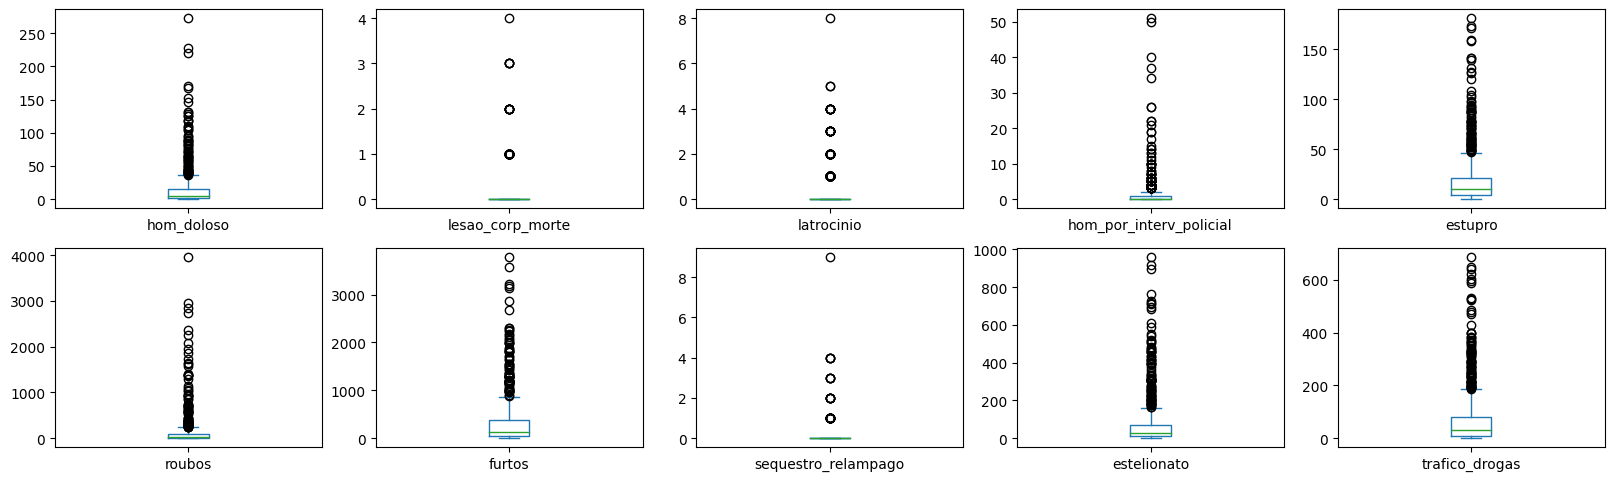

In [200]:
# Histograma
selecao_interior.hist(layout = (5,5),figsize = (20,15),color="green")

# Density plot
selecao_interior.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

# Boxplot
selecao_interior.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

plt.show()

Devido a quantidade de municipios no interior e sua heterogeneidade os  gráficos não são muito conclusivos no sentido de visualização da distribuição.O interior tem 75 municípios e pelos gráficos podemos perceber que em alguns municipios para deteminado ano o número de incidentes foi maior em comparação aos outros. Mas isto requer uma análise mais detalhada por município o que não será realizada neste trabalho.

**Análise por Baixada Fluminense**

In [201]:
# Selecionando somente a baixada
selecao_baixada=agrupamento_regiao.get_group('Baixada Fluminense')

# Tabela com as medidas descritivas da baixada arredondadas para duas casas decimais
round(selecao_baixada.describe(percentiles=[.05,.25,.75,.95,.99]),2)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00
mean,105.91,0.63,3.47,23.95,93.76,3490.21,1443.35,1.19,388.00,139.53
std,119.43,1.04,4.60,30.84,97.20,4522.36,1748.46,2.12,461.44,143.15
min,2.00,0.00,0.00,0.00,1.00,13.00,24.00,0.00,8.00,3.00
5%,6.00,0.00,0.00,0.00,6.45,82.60,116.80,0.00,32.15,9.30
25%,27.00,0.00,0.00,2.00,29.75,390.25,318.75,0.00,77.75,41.00
50%,59.00,0.00,1.00,11.50,56.00,1344.00,871.00,0.00,228.00,85.50
75%,144.50,1.00,5.00,34.50,130.50,4662.75,1606.50,2.00,391.75,194.50
95%,384.25,2.00,13.70,87.25,325.20,14075.35,5807.60,5.85,1460.25,458.30
99%,467.70,4.00,19.88,120.94,354.31,16892.52,7154.04,8.00,1740.46,577.35


Pelas medidas descritivas vemos que a situação da Baixada Fluminense em comparação com a Capital é que o número de incidentes nos diversos tipos de crimes é menor porém é bem mais significativo que o Interior. Roubos e furtos são os crimes com maior número de incidentes na região. A Baixada é composta por 13 municipios alguns mais violentos que outros fora o fato de estarmos analisando 8 anos, o que é refletido nos gráficos a seguir.

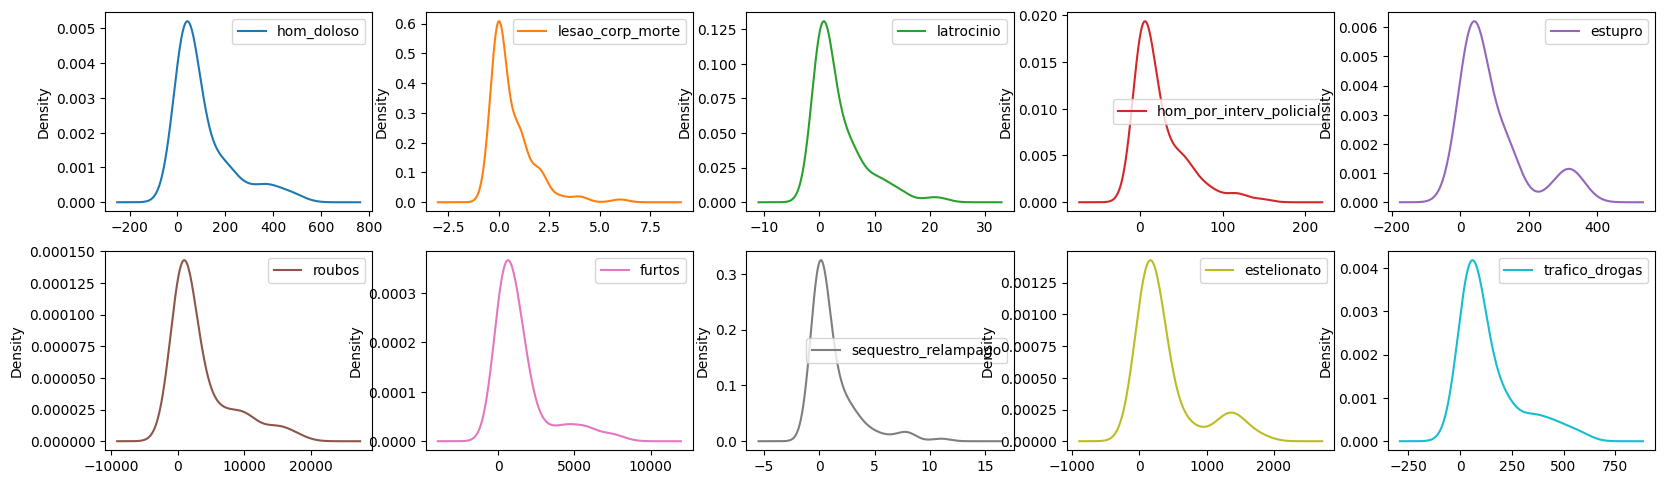

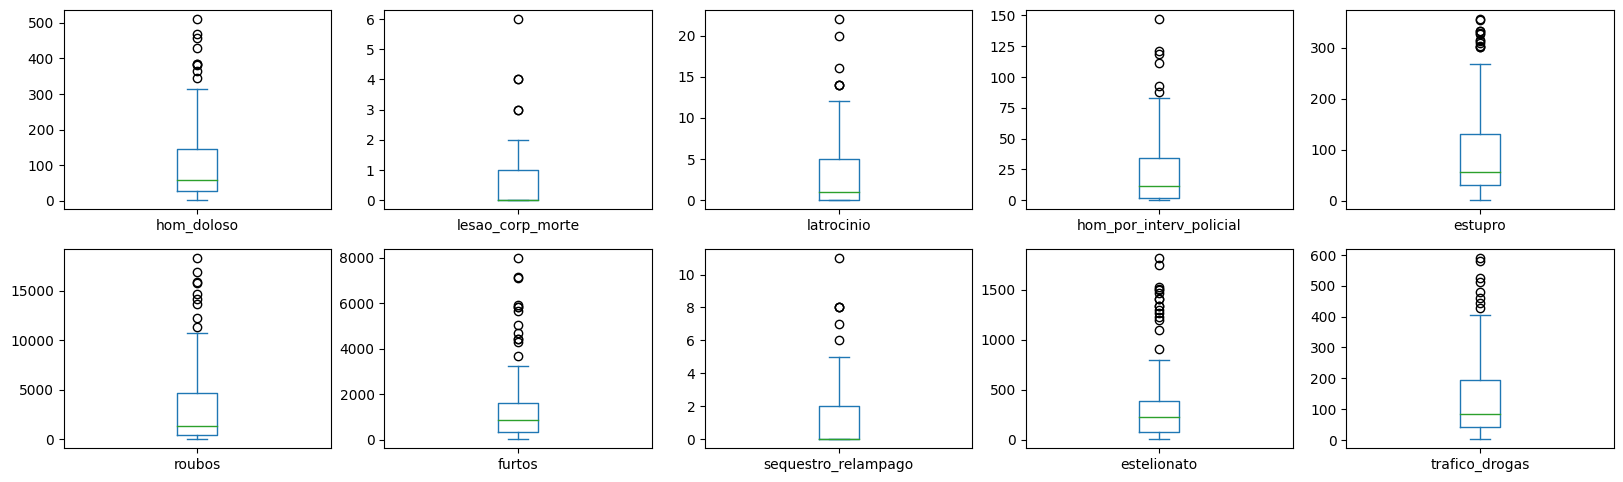

In [202]:
# Histograma
selecao_baixada.hist(layout = (5,5),figsize = (20,15),color="orange")

# Density plot
selecao_baixada.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

# Boxplot
selecao_baixada.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

plt.show()

Os gráficos mostram distribuições assimétricas com poucos anos com número de incidentes maior que são os outliers mostrados no boxplot. Para uma melhor análise deste ouliers seria necessário uma análise por município.

**Análise por Grande Niteroi**

In [203]:
# Selecionando somente Niteroi
selecao_niteroi=agrupamento_regiao.get_group('Grande Niterói')

# Tabela com as medidas descritivas de Niteroi arredondadas para duas casas decimais
round(selecao_niteroi.describe(percentiles=[.05,.25,.75,.95,.99]),2)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,137.67,1.08,7.08,60.83,135.83,7459.67,4121.12,4.00,985.38,358.96
std,123.82,1.10,6.98,64.09,88.84,7677.05,2762.13,4.23,668.32,312.69
min,7.00,0.00,0.00,1.00,9.00,124.00,195.00,0.00,58.00,12.00
5%,12.65,0.00,1.00,1.00,27.85,534.95,689.20,0.00,181.05,56.35
25%,50.00,0.00,2.00,4.75,56.50,953.25,1302.00,0.00,273.75,73.75
50%,81.50,1.00,4.00,51.50,142.00,5792.50,5006.50,3.50,1281.00,301.00
75%,266.00,2.00,10.25,82.25,193.00,10980.00,6455.25,6.25,1479.00,526.50
95%,342.90,2.85,21.10,194.05,262.85,21005.50,7708.75,11.00,1793.75,915.00
99%,391.97,3.77,24.31,215.17,300.73,23046.70,8140.14,13.31,2020.52,1081.16


Grande Niterói tem valores bem próximos da Baixada Fluminense na quantidade de incidentes. A região é composta por 3 municípios e pela verificação dos percentis 0.75, 0.95, 0.99 e o máximo temos uma maior homogeneidade no número de incidentes ao longo dos anos. Isto pode ser visto também no boxplot onde não temos nenhum outlier nas variáveis de crimes.

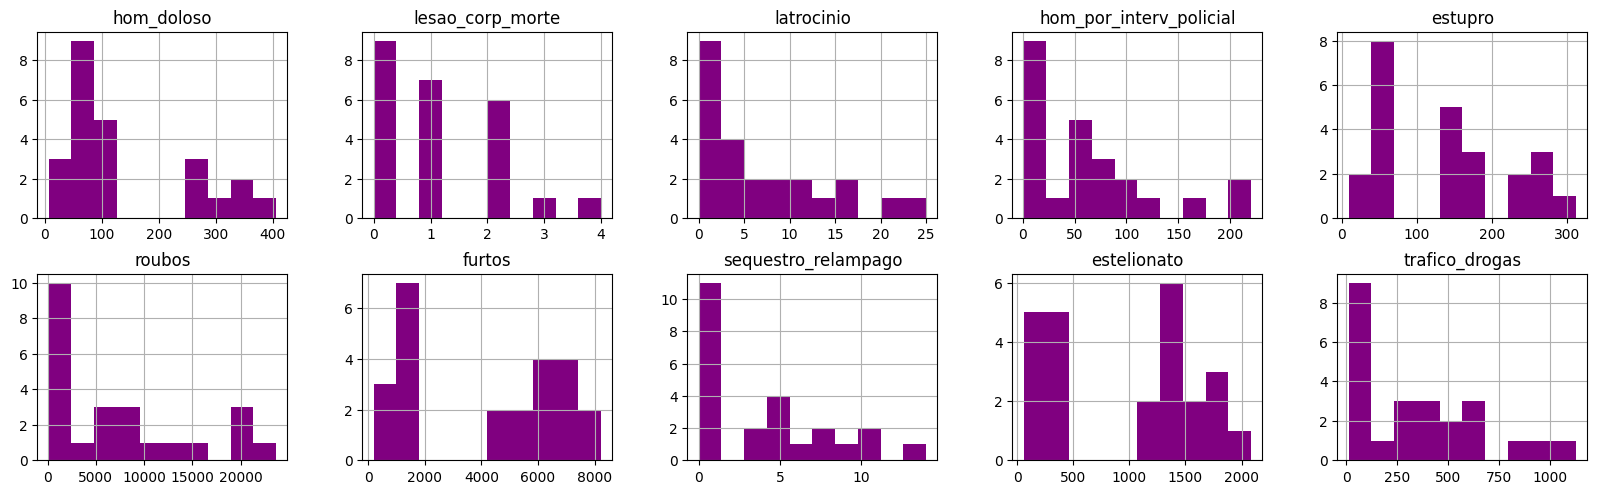

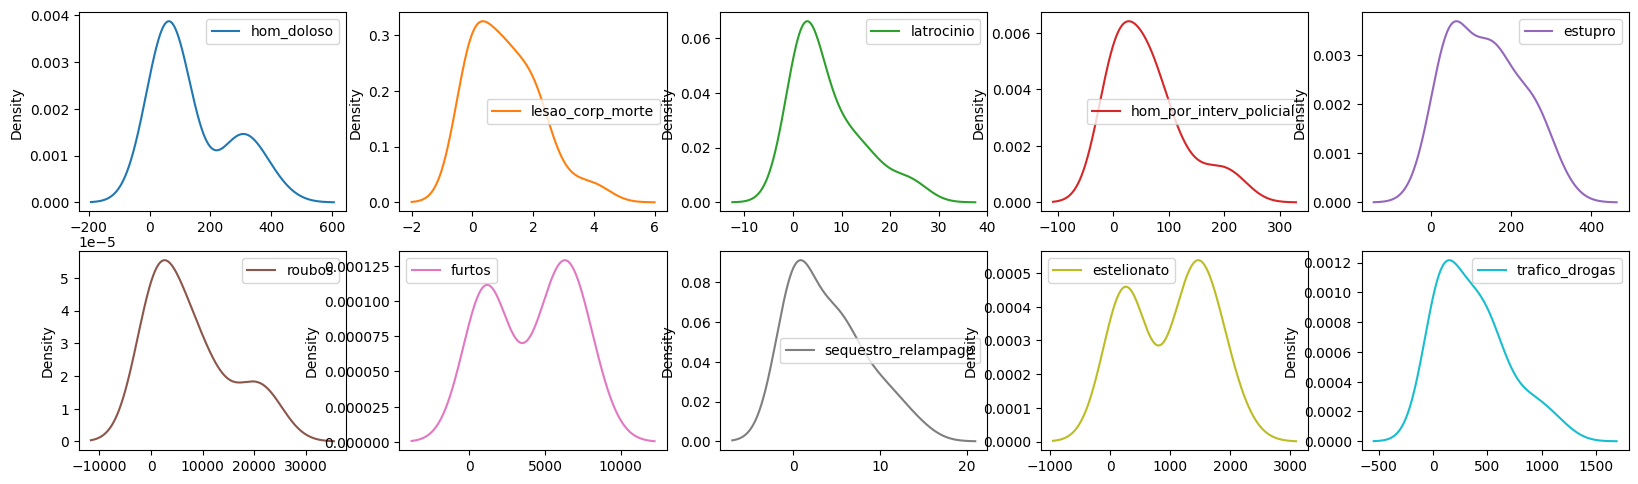

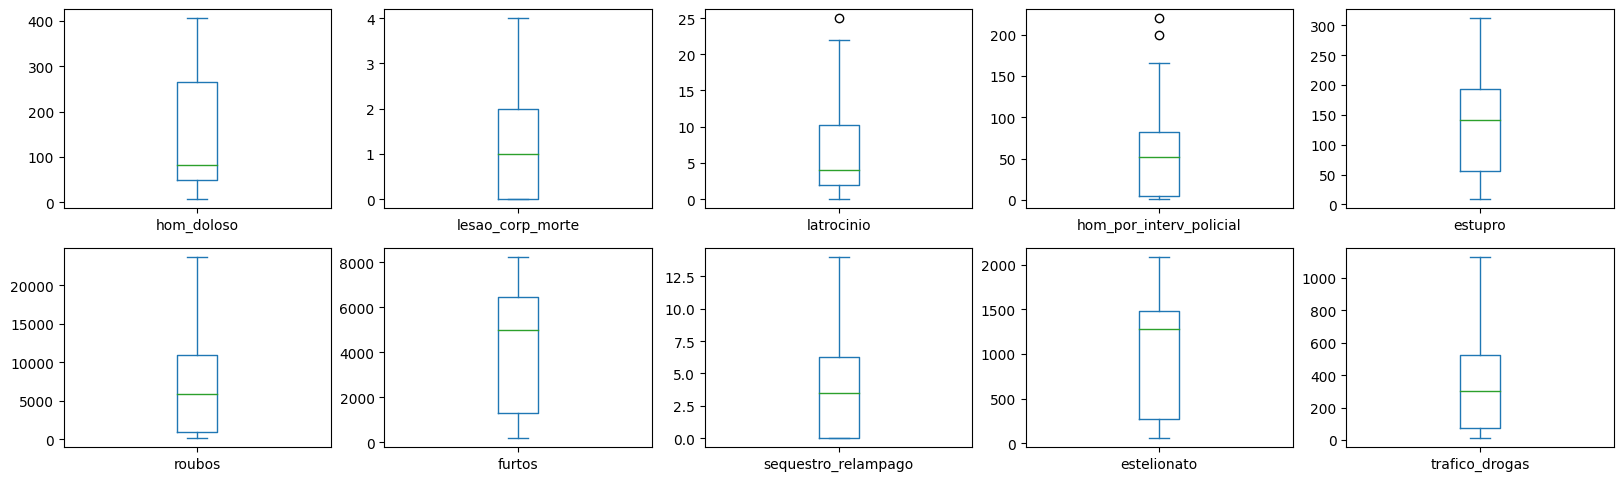

In [204]:
# Histograma
selecao_niteroi.hist(layout = (5,5),figsize = (20,15),color="purple")

# Density plot
selecao_niteroi.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

# Boxplot
selecao_niteroi.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

plt.show()

A análise da distribuição fica comprometida por termos poucas observações para análise visual. O boxplot reflete a assimetria verificada nas estatisticas calculadas quando comparamos a media e a mediana dos dados.

#**4. Análise por ano**

In [205]:
# somar os roubos agrupados por ano e indexados
sum_roubos_interior=selecao_interior.groupby(['ano','regiao'])['roubos'].sum().reset_index()
sum_roubos_baixada=selecao_baixada.groupby(['ano','regiao'])['roubos'].sum().reset_index()
sum_roubos_niteroi=selecao_niteroi.groupby(['ano','regiao'])['roubos'].sum().reset_index()

# somar os furtos agrupados por ano e indexados
sum_furtos_interior=selecao_interior.groupby(['ano','regiao'])['furtos'].sum().reset_index()
sum_furtos_baixada=selecao_baixada.groupby(['ano','regiao'])['furtos'].sum().reset_index()
sum_furtos_niteroi=selecao_niteroi.groupby(['ano','regiao'])['furtos'].sum().reset_index()

Nesta etapa faremos uma análise temporal dos dois crimes com maior número de incidências observado nas análises anteriores que foram roubos e furtos por região. Para isto foi necessário somar o número de incidentes dos municipios de cada região em cada ano, conforme comandos acima.

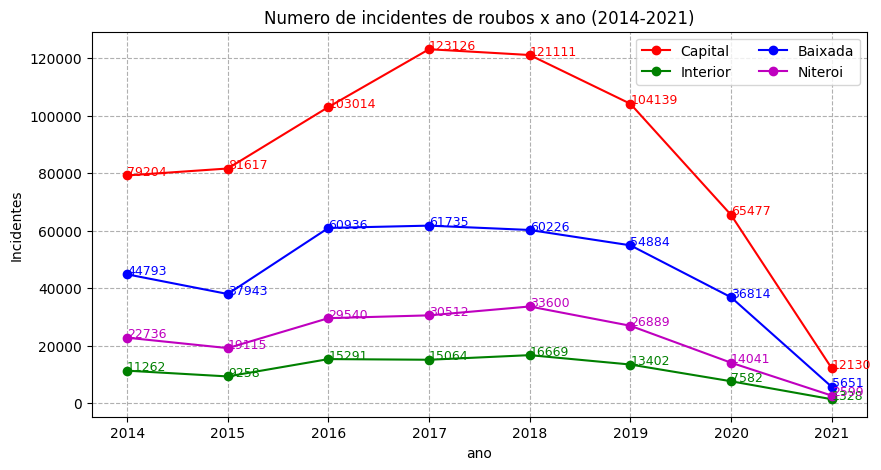

In [206]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
# somar os hoicidios agrupados por ano
fig, ax = plt.subplots(figsize = (10,5))

# Plota o gráfico de linha
# Note que os parâmetros para os vetores associados os eixos X e Y
ax.plot(selecao_capital['ano'], selecao_capital['roubos'],label='Capital',color = 'r',marker = "o")
for x,y in zip(selecao_capital['ano'],selecao_capital['roubos']):
  ax.text(x,y, y,color = 'r',fontsize = 9)

ax.plot(sum_roubos_interior['ano'], sum_roubos_interior['roubos'],label='Interior',color = 'g',marker = "o")
for x,y in zip(sum_roubos_interior['ano'],sum_roubos_interior['roubos']):
  ax.text(x,y, y,color = 'g',fontsize = 9)

ax.plot(sum_roubos_baixada['ano'], sum_roubos_baixada['roubos'],label='Baixada',color = 'b',marker = "o")
for x,y in zip(sum_roubos_baixada['ano'],sum_roubos_baixada['roubos']):
  ax.text(x,y, y,color = 'b',fontsize = 9)

ax.plot(sum_roubos_niteroi['ano'], sum_roubos_niteroi['roubos'],label='Niteroi',color = 'm',marker = "o")
for x,y in zip(sum_roubos_niteroi['ano'],sum_roubos_niteroi['roubos']):
  ax.text(x,y, y,color = 'm',fontsize = 9)

# Acrescenta um título ao gráfico
ax.set_title('Numero de incidentes de roubos x ano (2014-2021)')

# Define os rótulos dos eixos
ax.set_xlabel('ano')
ax.set_ylabel('Incidentes')

# Acrescenta legenda
plt.legend(loc = 'upper right', ncol = 2)

#incluindo grid
plt.grid(linestyle='--')

# Exibe o gráfico
plt.show()

A capital do estado detém a maior parte dos incidentes do crime de roubos seguida pela Baixada Fluminense. Houve nas quatro regiões uma redução no periodo de pandemia nos 2020 e 2021 sendo que é bem mais expressiva na Capital. O número de incidentes em cada ano na capital é próximo do dobro do número de incidentes da segunda região com maior número de incidentes que é a Baixada Fluminense. O Interior apesar de ter o maior número de municípios possui baixo número de incidentes e para este tipo de crime na pandemia a redução foi pequena quando comparamos com anos anteriores.

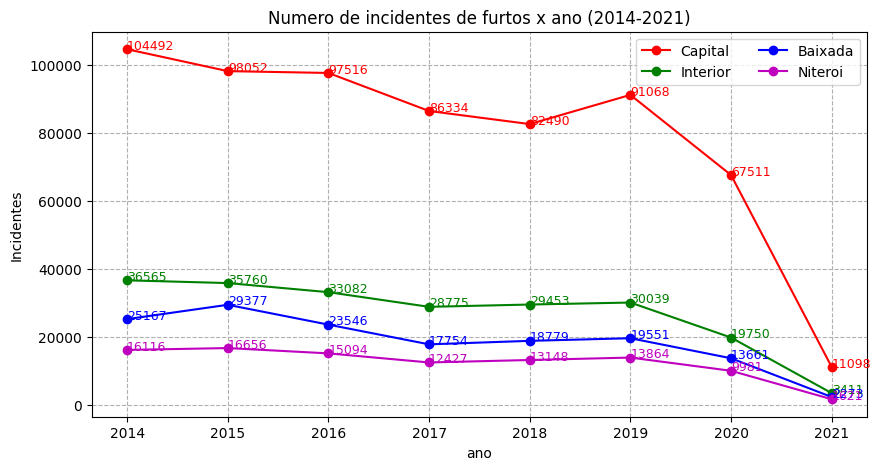

In [207]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
# somar os hoicidios agrupados por ano
fig, ax = plt.subplots(figsize = (10,5))

# Plota o gráfico de linha
# Note que os parâmetros para os vetores associados os eixos X e Y
ax.plot(selecao_capital['ano'], selecao_capital['furtos'],label='Capital',color = 'r',marker = "o")
for x,y in zip(selecao_capital['ano'],selecao_capital['furtos']):
  ax.text(x,y, y,color = 'r',fontsize = 9)

ax.plot(sum_furtos_interior['ano'], sum_furtos_interior['furtos'],label='Interior',color = 'g',marker = "o")
for x,y in zip(sum_furtos_interior['ano'],sum_furtos_interior['furtos']):
  ax.text(x,y, y,color = 'g',fontsize = 9)

ax.plot(sum_furtos_baixada['ano'], sum_furtos_baixada['furtos'],label='Baixada',color = 'b',marker = "o")
for x,y in zip(sum_furtos_baixada['ano'],sum_furtos_baixada['furtos']):
  ax.text(x,y, y,color = 'b',fontsize = 9)

ax.plot(sum_furtos_niteroi['ano'], sum_furtos_niteroi['furtos'],label='Niteroi',color = 'm',marker = "o")
for x,y in zip(sum_furtos_niteroi['ano'],sum_furtos_niteroi['furtos']):
  ax.text(x,y, y,color = 'm',fontsize = 9)

# Acrescenta um título ao gráfico
ax.set_title('Numero de incidentes de furtos x ano (2014-2021)')

# Define os rótulos dos eixos
ax.set_xlabel('ano')
ax.set_ylabel('Incidentes')

# Acrescenta legenda
plt.legend(loc = 'upper right', ncol = 2)

#incluindo grid
plt.grid(linestyle='--')

# Exibe o gráfico
plt.show()

O número de incidentes do crime furto na Capital é muito mais expressivo que as demais regiões. Nos anos iniciais da análise chega a ser mais que o dobro do somatório das outras regiões. No caso desta variável Grande Niterói possui maior incidência que a Baixada ao longo dos anos analisados. Também houve nas quatro regiões uma redução no periodo de pandemia nos 2020 e 2021 sendo que é bem mais expressiva na Capital e menos expressiva no Interior.

#**5. Conclusão**

Vimos nas análises anteriores que a Capital do Rio de Janeiro concentra o maior número de incidentes e o Interior o menor para os tipos de crimes avaliados neste periodo de tempo. Os crimes com maiores incidências nos anos foram roubos e furtos independente do grupo analisado. Analisando detalhadamente os gráficos temporais de roubos e furtos observou-se que houve uma redução no número de incidentes  nos anos de 2020 e 2021 explicado pela pandemia do COVID-19. Nesta análise não foi considerado o tamanho da população o que pode afetar as taxas de criminalidade em cada região. A Capital por ter maior população é esperado um maior número de incidentes. A análise por munícipio seria bastante extensa e preferimos utilizar os grupos definidos geograficamente. Esta análise exploratória pode ser um passo inicial para a aplicação de um modelo não supervisionado de clusterização onde poderemos ter municípios de regiões distintas no mesmo grupo por serem similares em relação ao número de incidentes. Ressalta-se que o contexto problemático é bastante complexo requerendo sugestões de estudiosos da área.